Context: Suppose the managerial team of an online retail shop approaches you, a data scientist, with the dataset wanting to know whether customers will make their next purchase 90 days from the day they made their last purchase. Your answer to their inquiry will help them identify which customers their marketing team need to have a focus on with regard to the next promotional offers they will be rolling out.

Build a machine learning model that predicts whether an online customer of a retail shop will make their next purchase 90 days from the day they made their last purchase.

In [91]:
#importing libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
#Read the data
df=pd.read_csv(r"C:\Users\tnsre\OneDrive\Desktop\online_retail_II.csv",encoding = 'unicode_escape')

In [93]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009,1.25,13085.0,United Kingdom


In [94]:
df.shape

(1048575, 8)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [96]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1048575,1048575,1044203,1.048575e+06,1048575,1.048575e+06,811893.000000,1048575
unique,52961,5304,5692,NaN,599,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,06-12-2010,NaN,NaN,United Kingdom
freq,1350,5781,5875,NaN,7756,NaN,NaN,963819
mean,NaN,NaN,NaN,9.957525e+00,NaN,4.627346e+00,15324.712265,NaN
std,NaN,NaN,NaN,1.335187e+02,NaN,1.228024e+02,1697.033034,NaN
min,NaN,NaN,NaN,-7.421500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13971.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,15260.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.150000e+00,16795.000000,NaN


In [97]:
#checking null values
df.isna().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [98]:
#checking duplicate values
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [99]:
#Droping null values
df1=df.dropna()
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04-12-2011,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04-12-2011,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04-12-2011,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04-12-2011,2.89,16931.0,United Kingdom


In [10]:
#checking null values
df1.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

# DATA VISUALIZATION

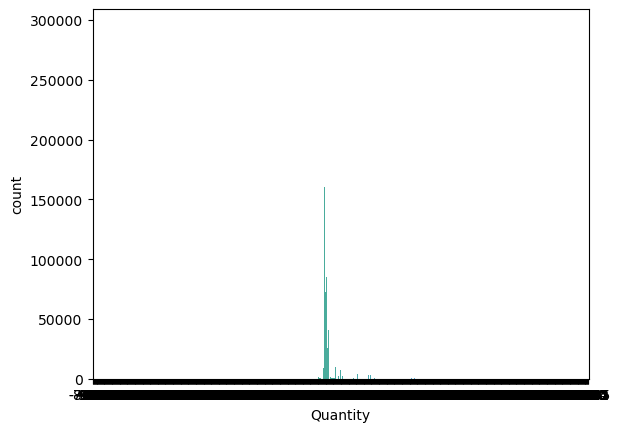

In [11]:
#UNIVARIATE;
ax=sns.countplot(data=df1,x=df['Quantity'])

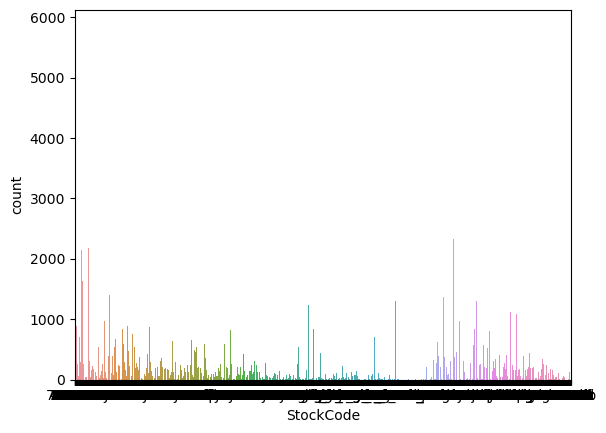

In [12]:
ax=sns.countplot(data=df1,x=df['StockCode'])

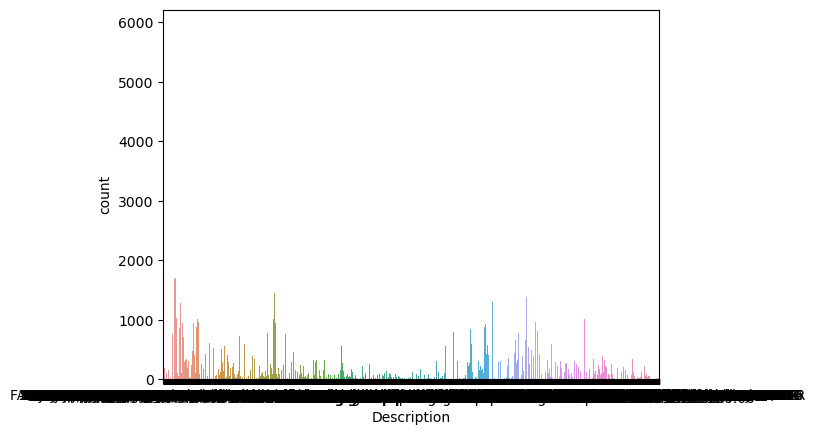

In [13]:
ax=sns.countplot(data=df1,x=df['Description'])

In [14]:
#checking unique values
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

[Text(0, 0, 'United Kingdom'),
 Text(1, 0, 'France'),
 Text(2, 0, 'USA'),
 Text(3, 0, 'Belgium'),
 Text(4, 0, 'Australia'),
 Text(5, 0, 'EIRE'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Portugal'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Denmark'),
 Text(10, 0, 'Nigeria'),
 Text(11, 0, 'Netherlands'),
 Text(12, 0, 'Poland'),
 Text(13, 0, 'Spain'),
 Text(14, 0, 'Channel Islands'),
 Text(15, 0, 'Italy'),
 Text(16, 0, 'Cyprus'),
 Text(17, 0, 'Greece'),
 Text(18, 0, 'Norway'),
 Text(19, 0, 'Austria'),
 Text(20, 0, 'Sweden'),
 Text(21, 0, 'United Arab Emirates'),
 Text(22, 0, 'Finland'),
 Text(23, 0, 'Switzerland'),
 Text(24, 0, 'Unspecified'),
 Text(25, 0, 'Malta'),
 Text(26, 0, 'Bahrain'),
 Text(27, 0, 'RSA'),
 Text(28, 0, 'Bermuda'),
 Text(29, 0, 'Hong Kong'),
 Text(30, 0, 'Singapore'),
 Text(31, 0, 'Thailand'),
 Text(32, 0, 'Israel'),
 Text(33, 0, 'Lithuania'),
 Text(34, 0, 'West Indies'),
 Text(35, 0, 'Lebanon'),
 Text(36, 0, 'Korea'),
 Text(37, 0, 'Brazil'),
 Text(38, 0, 'Canada'),
 Text(39, 0

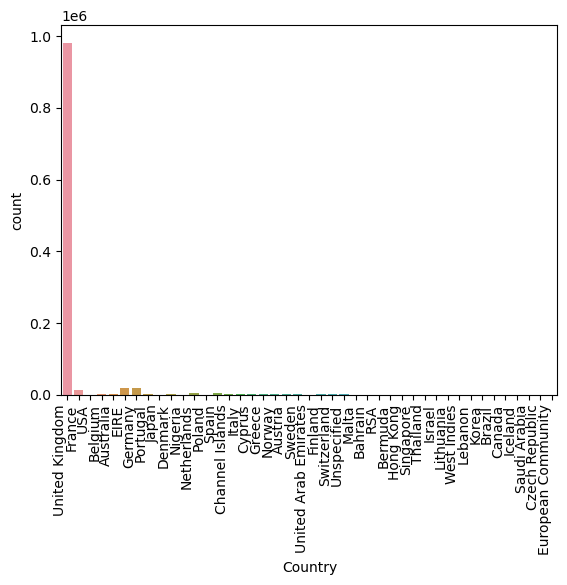

In [15]:
#BIVARIATE;
ax=sns.countplot(data=df1,x=df['Country'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')

C:\Users\tnsre\AppData\Local\Temp\ipykernel_1520\2879339310.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),rotation=15,ha='right')


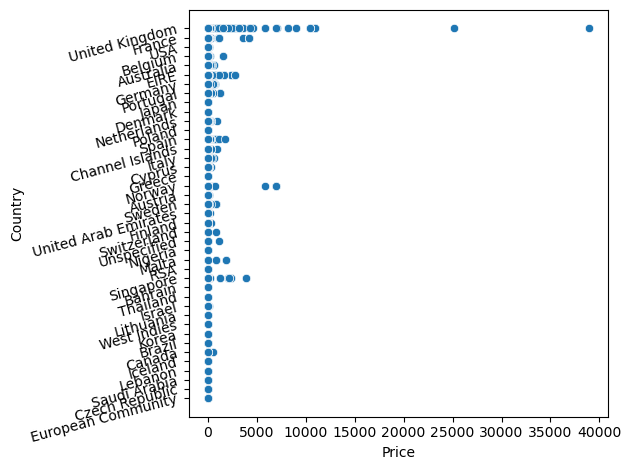

In [16]:
#BIVARIATE;
ax=sns.scatterplot(df1,x="Price",y="Country")
ax.set_yticklabels(ax.get_yticklabels(),rotation=15,ha='right')
plt.tight_layout()

C:\Users\tnsre\AppData\Local\Temp\ipykernel_1520\1519164210.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(),rotation=15,ha='right')


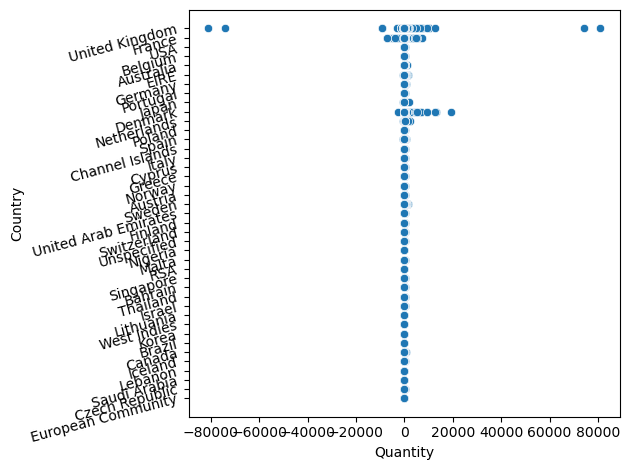

In [17]:
#BIVARIATE;
ax=sns.scatterplot(df1,x="Quantity",y="Country")
ax.set_yticklabels(ax.get_yticklabels(),rotation=15,ha='right')
plt.tight_layout()

# PROBLEM STATEMENT : How much will the customer spend in the next 90 days?

In [113]:
#converting str into timestamp
import datetime as dt
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])
df1['InvoiceDate']

C:\Users\tnsre\AppData\Local\Temp\ipykernel_1520\1217921287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])


0         2009-01-12
1         2009-01-12
2         2009-01-12
3         2009-01-12
4         2009-01-12
             ...    
1048570   2011-04-12
1048571   2011-04-12
1048572   2011-04-12
1048573   2011-04-12
1048574   2011-04-12
Name: InvoiceDate, Length: 811893, dtype: datetime64[ns]

In [114]:
#finding max invoice date
import datetime as dt
from datetime import timedelta 
max1=df1['InvoiceDate'].max()
max1

Timestamp('2011-12-10 00:00:00')

In [116]:
max_date = df1['InvoiceDate'].max()
cutoff_timedelta = dt.timedelta(days=90)
cutoff_date = max_date - cutoff_timedelta
cutoff_date

Timestamp('2011-09-11 00:00:00')

In [117]:
before_cutoff = df1[df1['InvoiceDate'] <= cutoff_date]
after_cutoff = df1[df1['InvoiceDate'] > cutoff_date]

In [119]:
#Creating the target dataframe
targets = after_cutoff.groupby('Customer ID').sum().rename({'Revenue' : 'total_spend_90'}, axis=1).assign(spend_90 = 1)
targets.drop(['Quantity','Price'], axis=1, inplace=True)
targets.head()

C:\Users\tnsre\AppData\Local\Temp\ipykernel_1520\550295751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  targets = after_cutoff.groupby('Customer ID').sum().rename({'Revenue' : 'total_spend_90'}, axis=1).assign(spend_90 = 1)


,spend_90
Customer ID,
12347.0,1
12348.0,1
12349.0,1
12352.0,1
12356.0,1


In [121]:
# create analysis date
analysis_date = df1['InvoiceDate'].max() + dt.timedelta(days=1)

In [123]:
features = before_cutoff.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (analysis_date-InvoiceDate.max()).days,#recency
                              'Invoice': lambda Invoice: Invoice.nunique(),#frequency
                              
                              })

In [124]:
features.columns = ['recency', 'frequency']

In [ ]:
# Merge features and targets dataframe
features_df = pd.merge(features, targets, how='left', on='Customer ID').fillna(0)
features_df

# importing libraries and fitting model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error

In [142]:
X = features_df.drop(['spend_90'], axis=1)
X

,recency,frequency
Customer ID,,
12346.0,327,17
12347.0,96,6
12348.0,221,4
12349.0,409,4
12350.0,312,1
...,...,...
18283.0,150,16
18284.0,549,2
18285.0,662,1


In [172]:
#importing libraries and splitting train_test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X['recency'] ,X['frequency'],test_size=0.2, random_state=None, shuffle=True)

In [173]:
#split data
y_spend = features_df[['spend_90']]
y_spend = y_spend.to_numpy().reshape(-1)
y_spend

array([0., 1., 1., ..., 0., 0., 1.])

In [174]:
#preparing the pipeline
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=42)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=42))
}

In [175]:
# Preparing grid parameters
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 4, 6],
        'randomforestregressor__min_samples_leaf': [1, 2, 3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [146]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=5, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X, y_spend)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.


In [176]:
#Evaluating model
for algo,model in fit_models.items():
    yhat = model.predict(X)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_spend, yhat), mean_absolute_error(y_spend, yhat)))

rf scores - R2:0.4793431280648257 MAE:0.27835587823247954
gb scores - R2:0.29593917782930923 MAE:0.3520246982393774


In [177]:
#prediction classification
prediction_reg = fit_models['gb'].predict(X)
prediction_reg

array([0.63138339, 0.59052633, 0.35302643, ..., 0.06391724, 0.15230645,
       0.53479402])

In [178]:
#probability of making a purchase
pred_reg_df = pd.DataFrame(prediction_reg, columns=['prediction_spend'])
pred_reg_df.head()

,prediction_spend
0,0.631383
1,0.590526
2,0.353026
3,0.274577
4,0.324478


In [179]:
# Get GradientBoostingRegressor from fit_models
gb_model = fit_models['gb'].best_estimator_.named_steps['gradientboostingregressor']

In [180]:
# Get feature importance
feature_importance = gb_model.feature_importances_

In [181]:
# Create dataframe for show feature importance
df_feature_importance = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importance})

In [182]:
# Sorting feature importance
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)

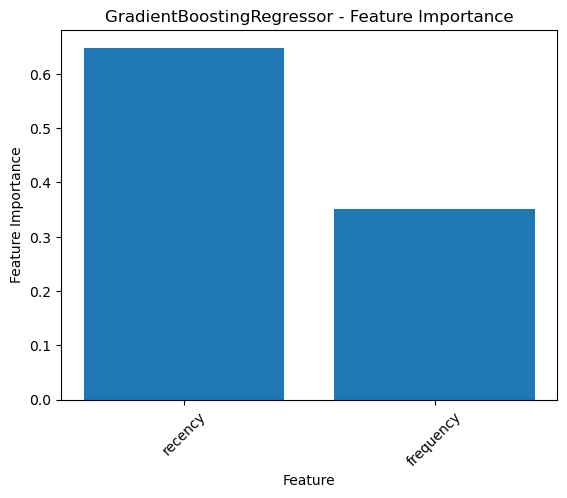

In [183]:
# Show feature importance as barplot
plt.bar(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('GradientBoostingRegressor - Feature Importance')
plt.xticks(rotation=45)
plt.show()